# 3.8. Model Selection and Cross-Validation




-----

In [36]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
from IPython.display import Image

### What is a good model ?
- Depending on your business goal, a model that has high accuracy/precision/recall/f1-score
- A good model is not the one that gives accurate predictions on the known data or training data but the one which gives good predictions on the new data and avoids overfitting and underfitting.

---- 

## 1.  Overfitting and Underfitting

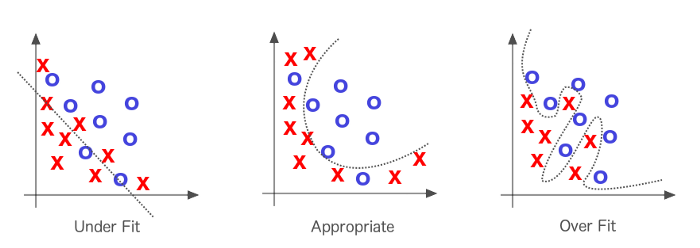

- ##### Overfit Model:  
Intuitively, overfitting occurs when the model or the algorithm fits the data too well.
Overfitting a model result in good accuracy for training data set but poor results on new data sets. 
Such a model is not of any use in the real world as it is not able to predict outcomes for new cases.


- ##### Underfit Model: 
Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough

#### How do we avoid overfitting?

* More data points - bootstrap, synthetically oversample
* Fewer features
* Less complex models - more parameters in a model leads to more overfitting

* Cross validation

## 2. Cross-Validation

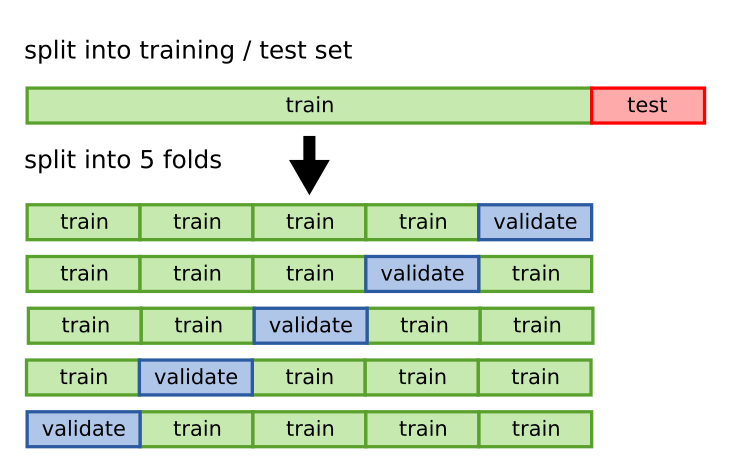


> With cross-validation, we don't need a separate validation dataset. We can use all our training data for model fitting and selection!

>A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.
To address this, we can split our initial dataset into separate training and test subsets


k-Fold Cross-Validation

Split the data into k subsets or folds
Reserve one fold as validation set and train on the remaining k-1
Train and evaluate k separate models
How do we split the data?
indexing your data - row 0 -> row n
sort your index
split into 1/k portions
if n = 100, k=5 k_1 = 1/5 = 0-19 k_2 = 2/5 = 20-39 ...
there could be a bias in your sampling
the results should reveal that
way around is to radomly sample using train test split (shuffle parameter set to True)
In sklearn we can use cross_val_score to to this for us:




-----

### 1) Define Business Goal



### 2) Get the data

In [15]:
df = pd.read_csv('penguins_simple.csv', sep=';')  
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.dropna(inplace=True)


In [16]:
df.head(3)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE


In [17]:
df.isna().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 3) Define X and Y

In [39]:
X = df[['culmen_length_mm']] #features/independent variables
y = df['body_mass_g']  #label/dependent variable

In [40]:
print(y.shape, type(y))

(333,) <class 'pandas.core.series.Series'>


In [41]:
print(X.shape, type(X))

(333, 1) <class 'pandas.core.frame.DataFrame'>


In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,y)

In [43]:
Xtrain.shape, Xtest.shape

((249, 1), (84, 1))

### 4) Exploratory Data Analysis

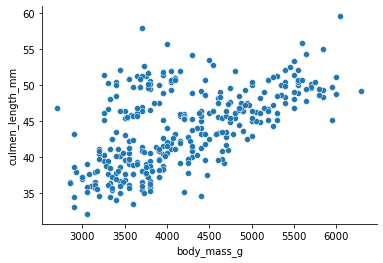

In [44]:
sns.scatterplot(data = df, x = 'body_mass_g', y = 'culmen_length_mm')
sns.despine()

### 5) Feature Engineering

### 6) Train the model(s)




In [45]:
m = LinearRegression()

In [46]:
m.fit(Xtrain,ytrain)

LinearRegression()

In [47]:
ypred = m.predict(Xtest)

### 7) Check train and test scores

In [48]:
# The score of the training data gives you an idea on the general performance of your model.


f' Train scores: LinReg {round(m.score(Xtrain,ytrain),3)}'

' Train scores: LinReg 0.396'

In [49]:
## The score with the test data gives us the actual perfomance we can expect in unseen data

f' Test scores: LinReg {round(m.score(Xtest,ytest),3)}'

' Test scores: LinReg 0.179'

### 7) Cross Validation

* We use cross-validation to evaluate both how good our model is, but also how robust it is.

In [50]:

from sklearn.model_selection import cross_val_score  #Run cross-validation for single metric evaluation.

In [51]:


cross_r2_lin = cross_val_score(m,   # estimator: # the model you want to evaluate 
                      Xtrain,         # the training input data 
                      ytrain,         # the training output data  
                      cv=5,          # number of cross validation datasets, k-folds 
                      scoring='r2'     # evaluation metric 
)

In [52]:
cross_r2_lin

array([0.53204492, 0.49442246, 0.45189505, 0.23120511, 0.1846981 ])

In [53]:
cross_r2_lin.mean()

0.37885312628205575

### What does the output mean?
* We have trained the model 5 times on 4/5 of our training set
* We use the remaining 1/5 each time as a validation set
* We calculate the test score on this validation set
* The scores are all the test scores from each split of our training data

### Q. What does it mean if your cross-validation scores fluctuate a lot?

If you have a binary classification problem and the fluctations are around 50%,
that means your model is giving completely random predictions or gennerally your model 
is not better than flipping a coin.

### Interpretation of results:

* If training score >> mean(validation_scores), you might be overfitting!
* If training score << mean(validation_scores), you might be underfitting!

* If there is high variation in the validation scores, then you have high sampling bias!
* If you do have high sampling bias (i.e. large variation in validation scores, you probably need more data, pick a different model, change hyperparameters).

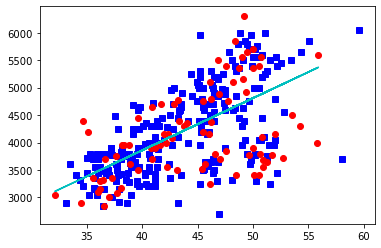

In [55]:
plt.plot(Xtrain, ytrain, 'bs',  label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xtest, ypred, 'c', label="fit")



### BONUS! 

* #### Try Shuffle Split CV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
